In [22]:
# https://austinrochford.com/posts/intro-prob-prog-pymc.html

In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from warnings import filterwarnings

from aesara import pprint
from matplotlib import pyplot as plt, ticker
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import pytensor.tensor as pt
from sklearn.preprocessing import StandardScaler

In [24]:
filterwarnings('ignore', category=RuntimeWarning, message="overflow encountered in exp")
filterwarnings('ignore', category=UserWarning, module='pymc',
               message="Unable to validate shapes: Cannot sample from flat variable")

In [25]:
FIG_SIZE = np.array([8, 6])
plt.rc('figure', figsize=FIG_SIZE)

dollar_formatter = ticker.StrMethodFormatter("${x:,.2f}")
pct_formatter = ticker.StrMethodFormatter("{x:.1%}")

sns.set(color_codes=True)

In [26]:
SEED = 123456789 # for reproducibility

rng = np.random.default_rng(SEED)

In [27]:
# You can either solve the algorith or apporxi

In [28]:
N = 5_000

x, y = rng.uniform(-1, 1, size=(2, N))

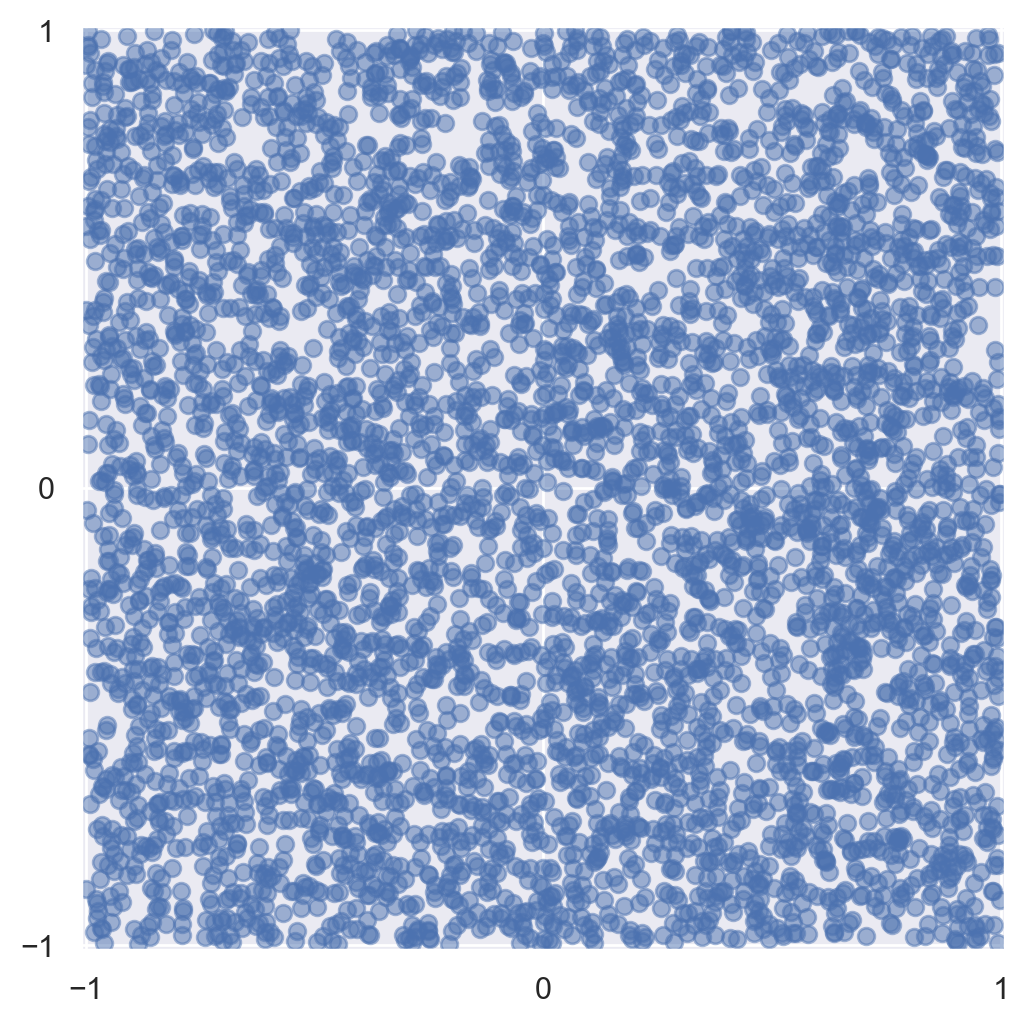

In [29]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ax.scatter(x, y, alpha=0.5);

ax.set_xticks([-1, 0, 1]);
ax.set_xlim(-1.01, 1.01);

ax.set_yticks([-1, 0, 1]);
ax.set_ylim(-1.01, 1.01);

In [30]:
in_circle = x**2 + y**2 < 1

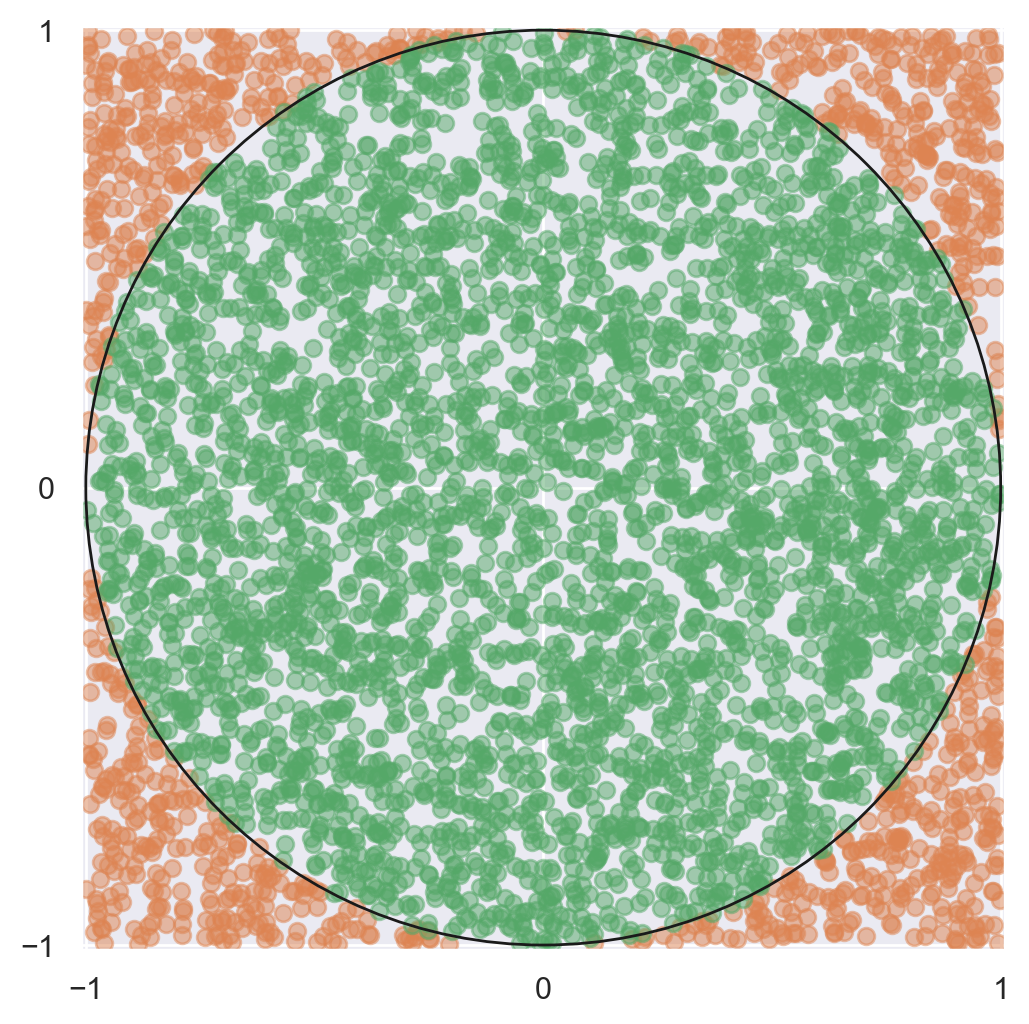

In [31]:
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

ax.scatter(x[~in_circle], y[~in_circle], c='C1', alpha=0.5);
ax.scatter(x[in_circle], y[in_circle], c='C2', alpha=0.5);

ax.add_artist(plt.Circle((0, 0), 1, fill=False, edgecolor='k'));

ax.set_xticks([-1, 0, 1]);
ax.set_xlim(-1.01, 1.01);

ax.set_yticks([-1, 0, 1]);
ax.set_ylim(-1.01, 1.01);

In [32]:
4 * in_circle.mean()

3.1488

In [55]:
import pymc as pm
from aesara import tensor as at
with pm.Model() as monty_model:
    car = pm.DiscreteUniform("car", 0, 2)

with monty_model:
    p_open = pt.switch(
        pt.eq(car, 0),
        np.array([0, 0.5, 0.5]), # it is behind the first door
        pt.switch(
            pt.eq(car, 1),
            np.array([0, 0, 1]), # it is behind the second door
            np.array([0, 1, 0])  # it is behind the third door
        )
    )

with monty_model:
    opened = pm.Categorical("opened", p_open, observed=2)

with monty_model:
    monty_trace = pm.sample()

c:\Users\jpark\miniconda3\envs\pymc_env\Lib\site-packages\multipledispatch\dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [car]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


In [56]:
monty_trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [57]:
(monty_trace.posterior["car"] == 0).mean()

<xarray.DataArray 'car' ()> Size: 8B
array(0.33425)

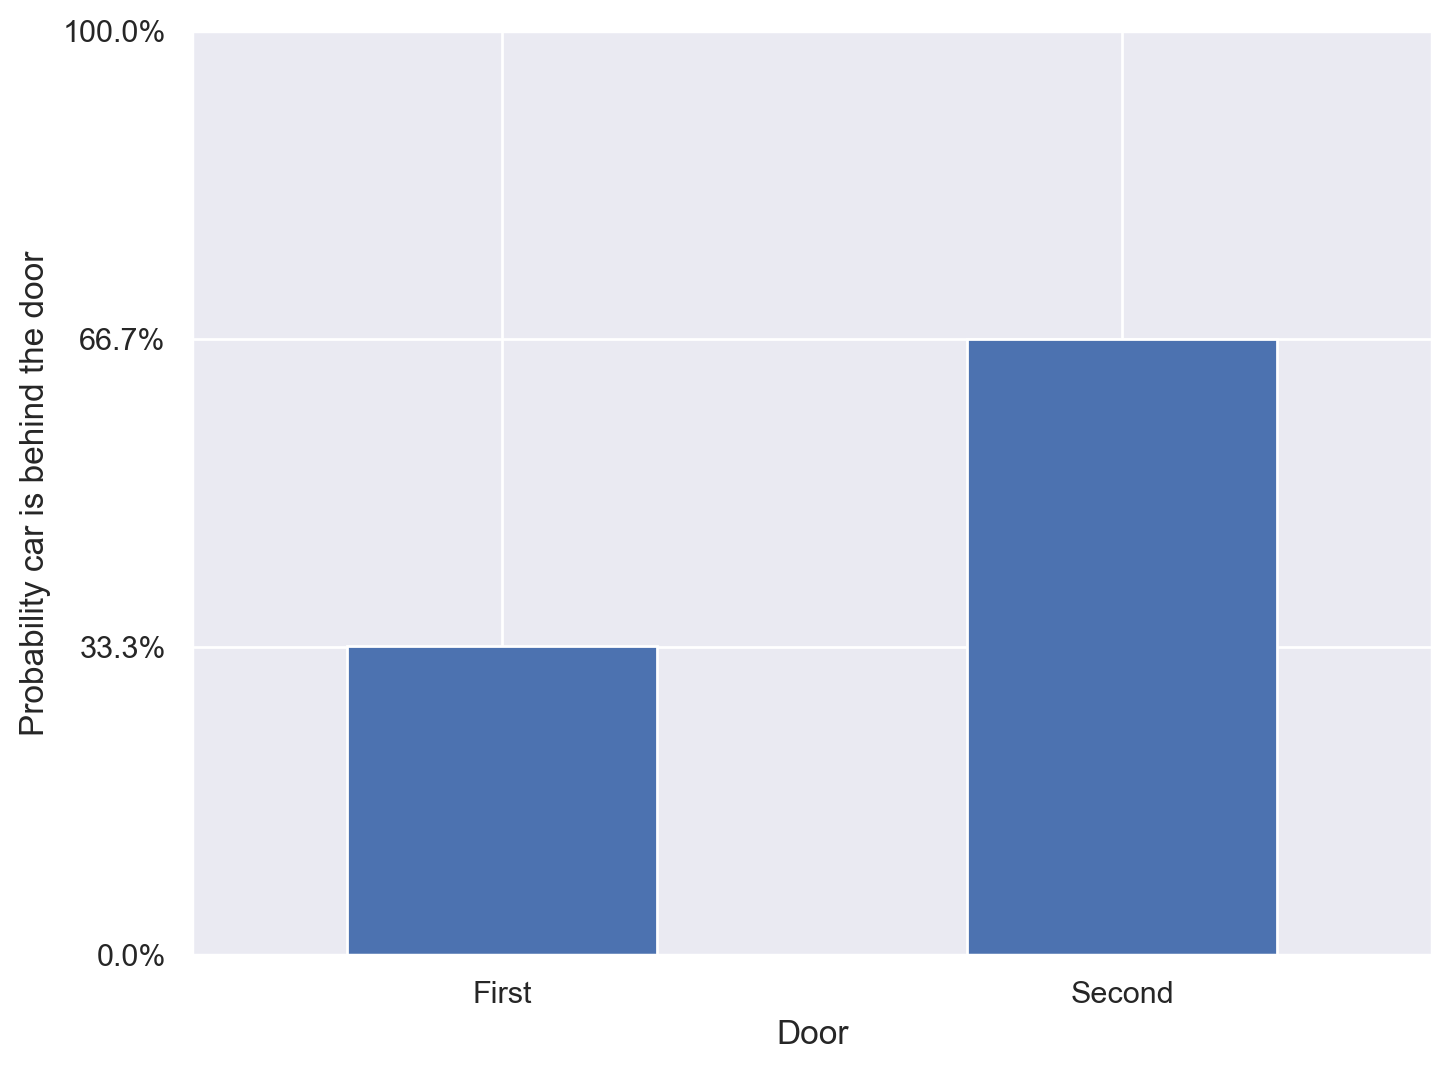

In [58]:
ax = (monty_trace.posterior["car"]
                 .to_dataframe()
                 .value_counts(normalize=True, sort=False)
                 .plot.bar(rot=0))

ax.set_xticklabels(["First", "Second"]);
ax.set_xlabel("Door");

ax.set_yticks(np.linspace(0, 1, 4));
ax.yaxis.set_major_formatter(pct_formatter);
ax.set_ylabel("Probability car is behind the door");